In [1]:
import sys
sys.path.insert(0, '../../TSProject/')

import random as rd
import math as mt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

In [3]:
import graph_class as gc

from algorithms import ALGO_brute_force as eduBF
from algorithms import fabian_bruteForce as fabBF
from algorithms import brute_force_marco as marBF
from algorithms import kris_brute_force as kriBF
from algorithms import greedy as gd
from algorithms import antColonyOptimization as aco
from algorithms import divideAndConquer as divc
from algorithms import branchAndBound as bnb
from algorithms import branchAndBoundBinaryTree as bnbt
from algorithms import ALGO_simulated_annealing as sa
from algorithms import dynamicProgramming as dp

In [ ]:
def createCoords(nCoords):
    coords = [[rd.randint(1,100),rd.randint(1,100)] for x in range(nCoords)]
    return coords

In [4]:
# Transforms coordinates input into an adjacency matrix
def coordWrapper(coords):
    adj_mat = np.zeros([len(coords),len(coords)])
    for idx in range(len(coords)):
        adj_mat[idx,idx] = np.inf
        for idx2 in range(idx+1,len(coords)):
            adj_mat[idx,idx2] = pdist([coords[idx],coords[idx2]])
            adj_mat[idx2,idx] = pdist([coords[idx],coords[idx2]])
    return adj_mat

In [7]:
highN = 11
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])
t3 = np.zeros([highN-lowN,1])
t4 = np.zeros([highN-lowN,1])
t5 = np.zeros([highN-lowN,1])
t6 = np.zeros([highN-lowN,1])
t7 = np.zeros([highN-lowN,1])
t8 = np.zeros([highN-lowN,1])
# t9 = np.zeros([highN-lowN,1])
# t10 = np.zeros([highN-lowN,1])
# t11 = np.zeros([highN-lowN,1])


for idx in range(lowN,highN):
    coords = createCoords(idx)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, stuff, t1[idx-lowN] = fabBF.bruteForce(graph, 
                                                 symmetric=True,
                                                 preload=False)
    t2[idx-lowN], resK = kriBF.bruteForce(coords)
    t3[idx-lowN], resM = marBF.bruteForce(coords)
    t4[idx-lowN], resE, dummy = eduBF.brute_force(graph, 
                                                  max_iterations=mt.factorial(idx), 
                                                  return_graph=False)
#     resF2, stuff, t5[idx-lowN] = gd.greedy(graph)
#     resF3, stuff, t6[idx-lowN] = aco.antColonyOptimization(graph, symmetric=True, 
#                                                                   num_agents=20, max_iter=10000, alpha=2, beta=1)
    
#     t7[idx-lowN], resE2, stuff = sa.simulated_annealing(graph)
    #
#     resM2, stuff, t8[idx-lowN] = bnb.BranchAndBound(graph)
    #resM3, stuff, t9[idx-lowN] = bnbt.BranchAndBoundBinaryTree(graph)
    #resM4, stuff, t10[idx-lowN] = divc.DivideAndConquer(graph)
    #resM5, stuff, t11[idx-lowN] = dp.DynamicProgramming(graph)
    
    print("For", idx, "nodes:",resF, resK, resM, resE)#, resM3)#, resM4, resM5)

For 6 nodes: 239.0 238.68452206417538 238.68452206417538 239
For 7 nodes: 224.0 224.76324468634218 224.76324468634218 224
For 8 nodes: 283.0 282.879813589157 282.879813589157 283
For 9 nodes: 280.0 278.7645898848906 278.7645898848906 280
For 10 nodes: 291.0 289.94702065588064 289.94702065588064 291


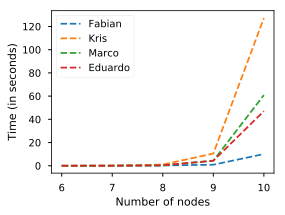

In [8]:
%config InlineBackend.figure_format = 'svg'

vals = np.transpose(np.squeeze([t1,t2,t3,t4]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['Fabian','Kris','Marco','Eduardo'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

In [14]:
highN = 13
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])

for idx in range(lowN,highN):
    coords = createCoords(idx)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, pathF, t1[idx-lowN] = fabBF.bruteForce(graph, 
                                                 symmetric=True,
                                                 preload=False)

    resM2, pathM, t2[idx-lowN] = bnb.BranchAndBound(graph)
    
    if resF != resM2:
        print(graph.weighted_adjacency_matrix)
        print(pathF)
        print(pathM2)
    
    print("For", idx, "nodes:",resF, resM2)#, resM3)#, resM4, resM5)

For 6 nodes: 248.0 248.0
For 7 nodes: 213.0 213.0
For 8 nodes: 261.0 261.0
For 9 nodes: 327.0 327.0
For 10 nodes: 300.0 300.0
For 11 nodes: 287.0 287.0
For 12 nodes: 313.0 313.0


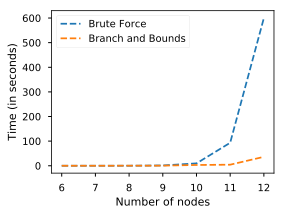

In [15]:
%config InlineBackend.figure_format = 'svg'

vals = np.transpose(np.squeeze([t1,t2]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['Brute Force','Branch and Bounds'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

In [ ]:
files = [#['a280',2579],
         ['berlin52',7542],['bier127',118282],
         #['brd14051',np.inf]
         ['ch130',6110],['ch150',6528],
         ['d198',15780],
         #['d493',35002],['d657',48912],
         #['d1291',50801],['d1655',62128],['d18512',645238],
         ['eil51',426],['eil76',538],['eil101',629],
         #['fl417',11861],
         #['fl1400',20127],['fl1577',22249],['fl3795',28772],['fnl4461',182566],
         ['gil262',2378],['kroA150',26524],['kroA200',29368],['kroB100',22141],['kroB150',26130],['kroB200',29437],
         ['kroC100',20749],['kroD100',21294],['kroE100',22068],
         ['lin105',14379],
         #['lin318',42029],
         #['nrw1379',56638],
         #['p654',34643],['pcb442',50778],
         #['pcb1173',56892],
         ['pr76',108159],['pr107',44303],['pr124',59030],['pr136',96772],['pr144',58537],
         ['pr152',73682],
         #['pr226',80369],['pr264',49135],['pr299',48191],['pr439',107217],
         #['pr1002',259045],['pr2392',378032],
         ['rat99',1211],['rat195',2323],
         #['rat575',6773],['rat783',8806],
         ['rd100',7910],
         #['rd400',15281],
         #['rl1304',252948],['rl1323',270199],['rl1889',316536],['rl5915',565530],['rl5934',556045],['rl11894',923288],
         #['ts225',126643],
         ['u159',42080]
         #,['u574',36905],['u724',41910]#,
         #['u1060',224094],['u1432',152970],['u1817',57201],
         #['u2152',64253],['u2319',234256],['usa13509',19982859],['vm1084',239297],['vm1748',336556]
        ]

datasets = pd.ExcelFile("../data/Symmetrical TSP/all_data_euc2d.xlsx",header=None)
# minpaths = pd.ExcelFile("../data/Symmetrical TSP/tsp_data_optimum_solutions.xlsx",header=None)

for file in files:
    data = np.array(pd.read_excel(datasets,file[0],header=None).iloc[:,1:])
    graph = gc.fully_connected_graph_from_coordinate_list(data)
    
    print('name:          ',file[0])
    print('optimal route: ',file[1])
    print('greedy:        ',gd.greedy(graph=graph)[0])
    #print('sim. annealing:',sa.simulated_annealing(graph=graph)[1])
    print('ACO:           ',aco.antColonyOptimization(graph=graph, num_agents=20, max_iter=1000, 
                                                      symmetric=True, alpha=1, beta=5, rho=.5)[0])
    print()

name:           berlin52
optimal route:  7542
greedy:         9161.0
ACO:            7674.0

name:           bier127
optimal route:  118282
greedy:         148614.0
ACO:            125103.0

name:           ch130
optimal route:  6110
greedy:         7341.0
ACO:            6498.0

name:           ch150
optimal route:  6528
greedy:         7700.0
ACO:            6769.0

name:           d198
optimal route:  15780
greedy:         19558.0
ACO:            17298.0

name:           eil51
optimal route:  426
greedy:         557.0
ACO:            452.0

name:           eil76
optimal route:  538
greedy:         631.0
ACO:            558.0

name:           eil101
optimal route:  629
greedy:         851.0
ACO:            696.0

name:           gil262
optimal route:  2378
greedy:         3050.0
ACO:            2599.0

name:           kroA150
optimal route:  26524
greedy:         11642.0
ACO:            10410.0

name:           kroA200
optimal route:  29368
greedy:         36824.0
ACO:            329